In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk/credit_risk_dataset.csv


# **Reading the Dataset**

In [2]:
data= pd.read_csv('/kaggle/input/credit-risk/credit_risk_dataset.csv')
data.sample(6).reset_index(drop=True)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,36000,MORTGAGE,2.0,VENTURE,B,5200,9.91,0,0.14,N,3
1,25,102000,MORTGAGE,5.0,EDUCATION,B,6975,9.91,0,0.07,N,3
2,25,27600,RENT,2.0,VENTURE,B,3200,12.21,0,0.12,N,2
3,22,21600,RENT,0.0,MEDICAL,A,1200,5.99,0,0.06,N,2
4,26,78000,MORTGAGE,8.0,PERSONAL,C,12000,13.43,0,0.15,N,4
5,28,42000,MORTGAGE,4.0,PERSONAL,B,10000,10.75,0,0.24,N,9


# **Data set Description**
* **person_age**: Age of the individual applying for the loan.
* **person_income**: Annual income of the individual.
* **person_home_ownership**: Type of home ownership of the individual.
* **rent**: The individual is currently renting a property.
* **mortgage**: The individual has a mortgage on the property they own.
* **own**: The individual owns their home outright.
* **other**: Other categories of home ownership that may be specific to the dataset.
* **person_emp_length**: Employment length of the individual in years.
* **loan_intent**: The intent behind the loan application.
* **loan_grade**: The grade assigned to the loan based on the creditworthiness of the borrower.
   * A: The borrower has a high creditworthiness, indicating low risk.
   * B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
   * C: The borrower's creditworthiness is moderate.
   * D: The borrower is considered to have higher risk compared to previous grades.
   * E: The borrower's creditworthiness is lower, indicating a higher risk.
   * F: The borrower poses a significant credit risk.
   * G: The borrower's creditworthiness is the lowest, signifying the highest risk.
* **loan_amnt**: The loan amount requested by the individual.
* **loan_int_rate**: The interest rate associated with the loan.
* **loan_status**: Loan status, where 0 indicates non-default and 1 indicates default.
  * 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
  * 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
* **loan_percent_income**: The percentage of income represented by the loan amount.
* **cb_person_default_on_fil**e: Historical default of the individual as per credit bureau records.
  * Y: The individual has a history of defaults on their credit file.
  * N: The individual does not have any history of defaults.
* **cb_preson_cred_hist_length**: The length of credit history for the individual.


# **Exploring the data se**t

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [5]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# **Checking the dataset for missing values and getting an overal count on the missing data**

In [7]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

 **The misssing records where droped from the dataset**

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

**To obtain credile data it is necessery to chech for duplictes** 

In [10]:
data.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [11]:
data.duplicated().sum()

137

# **Looking for outliers and dealing with them**

In [12]:
max_age = data['person_age'].max()
min_age = data['person_age'].min()
print(f"The maximum Age {max_age}")
print(f"The minimum Age {min_age}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Peple with age between {next} and {arr[i+1]}: {num_people}')
        
age_group([0 ,18, 26, 36, 46, 56, 66])


The maximum Age 144
The minimum Age 20
Peple with age between 1 and 18: 0
Peple with age between 19 and 26: 15682
Peple with age between 27 and 36: 10422
Peple with age between 37 and 46: 2054
Peple with age between 47 and 56: 372
Peple with age between 57 and 66: 87


<BarContainer object of 57 artists>

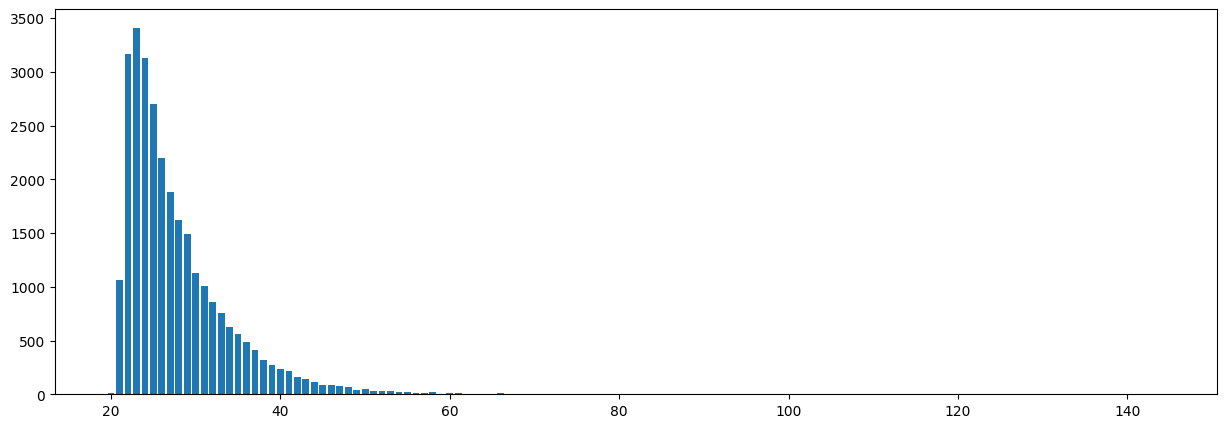

In [13]:
import matplotlib.pyplot as plt 
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)

In [14]:
(data['person_age'].value_counts().values>60).sum()

28

**The above infromation casts a light on the age feature and shows that ages above 60 are outliers hence  the best way is to remove values with ages above 60**

In [15]:
data = data.drop(data[data['person_age'] > 60].index, axis=0)

In [16]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-60'])

In [17]:
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-60'], ordered=True)

In [18]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25


**The next feature is the income field**

In [19]:
max_income = data['person_income'].max()
min_income = data['person_income'].min()

print(f"The largest Income is {max_income}")
print(f"The smallest Income is  {min_income}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

The largest Income is 2039784
The smallest Income is  4000
Income between 1 and 25000: Number of people 1967
Income between 25001 and 50000: Number of people 10181
Income between 50001 and 75000: Number of people 8522
Income between 75001 and 100000: Number of people 4187
Income between 100001 and inf: Number of people 3723


In [20]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])


In [21]:
data['income_group']

0        middle
1           low
2           low
3        middle
4        middle
          ...  
32574    middle
32575    middle
32576    middle
32577      high
32579      high
Name: income_group, Length: 28580, dtype: category
Categories (5, object): ['low' < 'low-middle' < 'middle' < 'high-middle' < 'high']

**Checking and dealing with the loan ammount feature**

In [22]:
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 8170
Loan Amount between 5001 and 10000: Number of people 10592
Loan Amount between 10001 and 15000: Number of people 5421
Loan Amount between 15001 and inf: Number of people 4397


In [23]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [24]:
data['loan_amount_group']

0        very large
1             small
2            medium
3        very large
4        very large
            ...    
32574    very large
32575         small
32576        medium
32577    very large
32579         large
Name: loan_amount_group, Length: 28580, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [25]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        14515
MORTGAGE    11779
OWN          2192
OTHER          94
Name: count, dtype: int64

In [26]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-25,middle,very large
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large


In [27]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
enc_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

# **Data Preprocessing**

In [28]:
X = data.drop(['loan_status'], axis=1)
Y = data['loan_status']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [30]:
print(x_train.shape,x_test.shape)

(22864, 14) (5716, 14)


In [31]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [32]:
x_train.columns

Index(['index', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group', 'income_group',
       'loan_amount_group'],
      dtype='object')

In [33]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(x_train[enc_colums])

OneHotEncoder()

In [34]:
enc.categories_

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-60', nan], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [35]:
merge_enc_col = np.concatenate((enc.categories_[0], 
                enc.categories_[1],
                enc.categories_[2],
                enc.categories_[3],
                enc.categories_[4],
                enc.categories_[5],
                enc.categories_[6],))

In [36]:
merge_enc_col

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'high', 'high-middle', 'low',
       'low-middle', 'middle', '20-25', '26-35', '36-45', '46-55',
       '56-60', nan, 'large', 'medium', 'small', 'very large'],
      dtype=object)

In [37]:
enc_data = pd.DataFrame(enc.transform(x_train[enc_colums]).toarray(), columns=merge_enc_col)
enc_data2 = pd.DataFrame(enc.transform(x_test[enc_colums]).toarray(),columns=merge_enc_col)

In [38]:
X_new = pd.concat([enc_data, x_train], axis=1)
X_new = X_new.drop(enc_colums, axis=1)


X_new_test = pd.concat([enc_data2, x_test], axis=1)
X_new_test = X_new_test.drop(enc_colums, axis=1)

In [39]:
X_new.head()
X_new.shape

(22864, 42)

In [40]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,small,very large,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23717,29,32000,10.0,9250,15.65,0.29,7
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,22127,30,52000,9.0,9000,12.49,0.17,6
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,15684,25,154000,2.0,9200,12.61,0.06,4
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,10267,23,66000,0.0,7800,7.88,0.12,3
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2570,25,32000,3.0,3000,8.94,0.09,3
